<a href="https://colab.research.google.com/github/7rashhi/LB23-weekday/blob/main/MNISt_Fashion_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install keras tuner



#https://keras.io/api/datasets/mnist/

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.2/21.2 MB 57.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 7.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pyaudio (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyaudio
  Created wheel for pymlconf: filename=pymlconf-3.0.1-py3-none-any.whl size=8719 sha256=2652eb1ec28a7de1b3765bafa1cf3338660657b6a5bdbe975b5549d60a99769f
  Stored in directory: /root/.cache/pip/wheels/b3/7c/a2/d497ecc4b26c08487371d77888e87beee1ba9fffd23f5954ce
Successfully built pymlconf
Failed to build pyaudio
ERROR: Could not build wheels for pyaudio, which is requir

In [10]:
!pip install keras tuner

  Using cached tuner-1.0.0b2-py3-none-any.whl (13 kB)
  Using cached Kivy-2.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (21.2 MB)
  Using cached pymlconf-3.0.1-py3-none-any.whl
  Using cached PyAudio-0.2.14.tar.gz (47 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Kivy_Garden-0.1.5-py3-none-any.whl (4.6 kB)
  error: subprocess-exited-with-error
  
  × Building wheel for pyaudio (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyaudio
Failed to build pyaudio
ERROR: Could not build wheels for pyaudio, which is required to install pyproject.toml-based projects


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [5]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
classes=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

label: Sandal


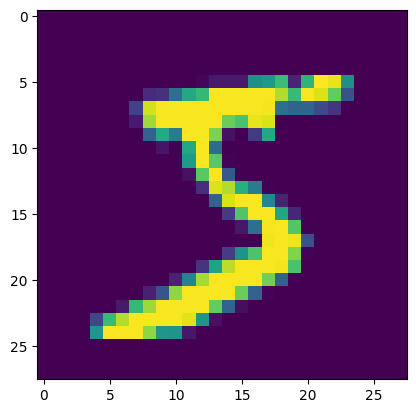

In [13]:
plt.imshow(x_train[0])
plt.show
print ('label:' ,classes[y_train[0]])

In [14]:
x_train=x_train/255.0
x_test=x_test/255.0

In [15]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
x_train=x_train.reshape(len(x_train),28,28,1)
x_test=x_test.reshape(len(x_test),28,28,1)

In [20]:
def build_model(hp):
  model=Sequential([
      Conv2D(filters=hp.Int('conv_1_filter',min_value=32,max_value=128,step=16),
         kernel_size=hp.Choice('conv_2_kernel',values=[3,5]),
         activation='relu',
         input_shape=(28,28,1)
            ),
      Conv2D(filters=hp.Int('conv_1_filter',min_value=32,max_value=64,step=16),
         kernel_size=hp.Choice('conv_2_kernel',values=[3,5]),
         activation='relu',
      ),
      MaxPooling2D((2,2)),
      Flatten(),
       Dense(units=hp.Int('dense_1_units',min_value=32,max_value=256,step=16),
         activation='relu'),
        Dense(units=hp.Int('dense_2_units',min_value=32,max_value=128,step=16),
         activation='relu'),
        Dense(10,activation='softmax')
      ])


    model.compile(optimizer=keras.optimizer.Adam(hp.Choice('learning_rate',values=[1e-2,1e-3,1e-4])),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
       return model

IndentationError: unexpected indent (<ipython-input-20-09b82e913a80>, line 22)

In [ ]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import hyperparameters

In [ ]:
tuner_output=RandomSearch(buld_model,objective='val_accuracy',
                                  max_trials=5,
                             project_name='Mnist Optimising')

In [ ]:
tuner_output.search(x_train,y_train,epochs=5,validation_split=0.3)

In [ ]:
model=tuner_output.get_best_models(num_models=1)[0]


In [ ]:
model[0].summary()

In [ ]:
model.fit(x_train,y_train,epochs=10,validation_split=0.1,initial_epoch=5)

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred[:5]

In [ ]:
y_class=[np.argmax(element)for element in y_pred]
y_class[:5]

In [ ]:
y_test[:5]

In [ ]:
def pred_val_img(val):
  plt.imshow(x_test[val])
  plt.show(
  print('Actual image is:',classes[y_test[val]])
  print('Predicted image is:',classes[y_class[val]])
  )

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDispaly
#import ConfusionMatrixDispaly
conf_matrix=confusion_matrix(y_test,y_class)
print(conf_matrix)

In [ ]:
conf_display=ConfusionMatrixDispaly.from_predictions(y_test,y_class)
print(conf_display)

In [ ]:
classes[0]